## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas. Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

Carregue o dataset "automobile-mod.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos. O dataset oroginal "automobile.csv" se encontra na mesma pasta apenas como referência. Não deverá ser utilizado.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import random
random.seed(1)

In [2]:
#Carrega o dataframe
dfautos = pd.read_csv("data/automobile-mod.csv", sep=";")

#Visualiza os 10 primeiros registros
dfautos.head(10)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante.

Text(0.5,0.98,'Heatmap de correção dos atributos do dataframe de carros')

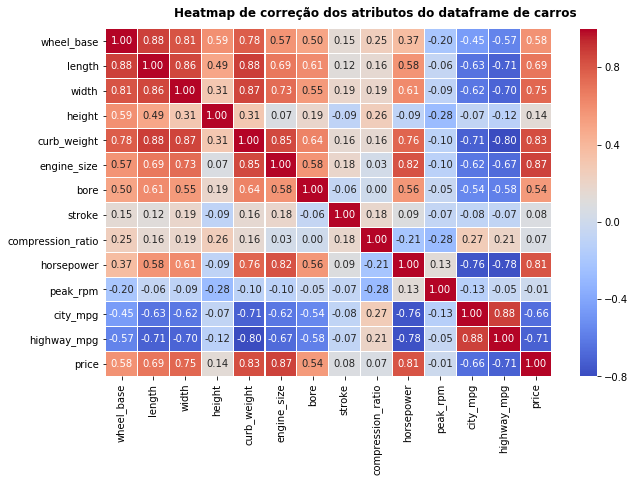

In [3]:
#Obtem uma matriz de correlação para facilitar a identificação de quais variáveis tem mais correlação no dataframe
corr = dfautos.corr()

#Plota essa matriz em formato de heatmap
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
hm = sns.heatmap(corr, ax=ax, cmap="coolwarm", annot=True, fmt='.2f', linewidths=.05)
fig.subplots_adjust(top=0.93)
fig.suptitle('Heatmap de correção dos atributos do dataframe de carros', fontsize=12, fontweight='bold')

**Análise da correlação dos dados**

Com a ajuda do heatmap na matriz de correção, identificamos que os seguintes atributos se correlacionam:
 - engine_size x horsepower (0.82)
 - engine_size x price (0.87)
 - highway_mpg x curb_weight (-0.80)

Também notamos algumas outras correlações com o peso do carro que são óbvias como:
 - curb_weight x width
 - curb_weight x length
 - curb_weight x engine_size
 
A seguir plotamos os gráficos com a correlação dos 3 cenários escolhidos:

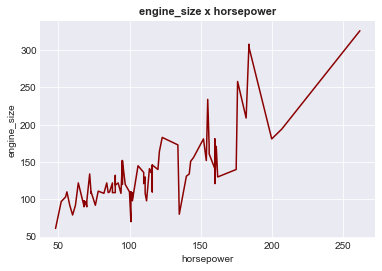

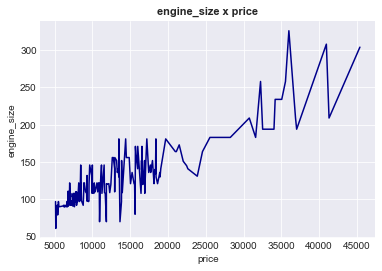

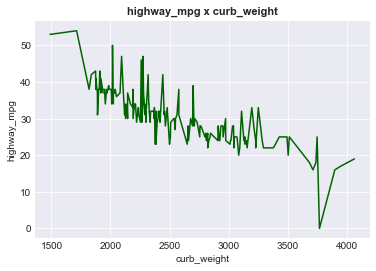

In [4]:
plt.style.use('seaborn-darkgrid')

#engine_size x horsepower
plt.title("engine_size x horsepower", fontsize=11, fontweight='bold')
plt.plot('horsepower', 'engine_size', data=dfautos.sort_values(by=['horsepower']), color='darkred')
plt.xlabel("horsepower")
plt.ylabel("engine_size")
plt.show()

#engine_size x price
plt.title("engine_size x price", fontsize=11, fontweight='bold')
plt.plot('price', 'engine_size', data=dfautos.sort_values(by=['price']), color='darkblue')
plt.xlabel("price")
plt.ylabel("engine_size")
plt.show()

#highway_mpg x curb_weight
plt.title("highway_mpg x curb_weight", fontsize=11, fontweight='bold')
plt.plot('curb_weight', 'highway_mpg', data=dfautos.sort_values(by=['curb_weight']), color='darkgreen')
plt.xlabel("curb_weight")
plt.ylabel("highway_mpg")
plt.show()

**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:**

| Correlação   | Justificativa |
| :----------------------- | :----- |
| engine_size x horsepower | Quanto maior o tamanho do motor maior também é a potência medida em hp. Essa medição pode ser um pouco distorcida em carros com motores turbo pois estes conseguem ter mais cavalos de potência em tamanhos menores. Mas em geral quanto maior o motor maior a potência também.|
| engine_size x price | Quanto maior o tamanho do motor mais caro o carro custa. Faz sentido se pensarmos que de fato os carros mais baratos do mercado tendem também a ser os carros com menor potência.|
| highway_mpg x curb_weight | Aqui temos uma correlação oposta: quanto menor o peso mais autonomia o veículo possui. Isso faz sentido porque carros mais leves tendem gastar menos combustível para mover seu próprio peso.|

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

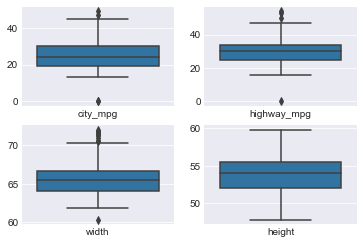

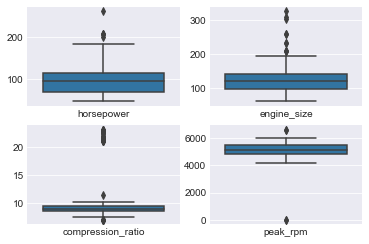

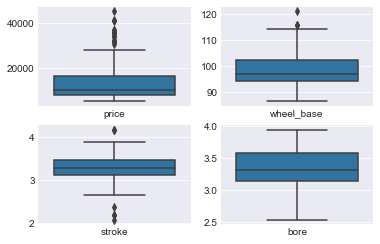

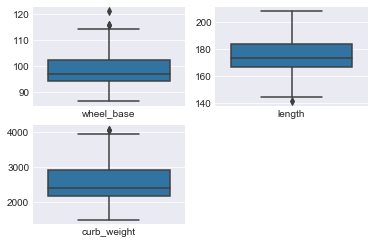

In [5]:
#Utilizamos o boxplot para visualizar quais atributos possuem outliers.
plt.subplot(2,2,1)
sns.boxplot(data=dfautos[['city_mpg']])
plt.subplot(2,2,2)
sns.boxplot(data=dfautos[['highway_mpg']])
plt.subplot(2,2,3)
sns.boxplot(data=dfautos[['width']])
plt.subplot(2,2,4)
sns.boxplot(data=dfautos[['height']])
plt.show()

plt.subplot(2,2,1)
sns.boxplot(data=dfautos[['horsepower']])
plt.subplot(2,2,2)
sns.boxplot(data=dfautos[['engine_size']])
plt.subplot(2,2,3)
sns.boxplot(data=dfautos[['compression_ratio']])
plt.subplot(2,2,4)
sns.boxplot(data=dfautos[['peak_rpm']])
plt.show()

plt.subplot(2,2,1)
sns.boxplot(data=dfautos[['price']])
plt.subplot(2,2,2)
sns.boxplot(data=dfautos[['wheel_base']])
plt.subplot(2,2,3)
sns.boxplot(data=dfautos[['stroke']])
plt.subplot(2,2,4)
sns.boxplot(data=dfautos[['bore']])
plt.show()

plt.subplot(2,2,1)
sns.boxplot(data=dfautos[['wheel_base']])
plt.subplot(2,2,2)
sns.boxplot(data=dfautos[['length']])
plt.subplot(2,2,3)
sns.boxplot(data=dfautos[['curb_weight']])
plt.show()

Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [9]:
#Identifica quais colunas possuem valores nulos
dfautos.isnull().sum()

#Resultado: colunas com valor nulo
#peak_rpm               2
#city_mpg               1
#highway_mpg            1

make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               2
city_mpg               1
highway_mpg            1
price                  0
dtype: int64

Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

In [10]:
#Analisa as colunas que possuem null
dfautos[['peak_rpm','city_mpg','highway_mpg']].head(10)

#Resultado: todos os campos são numéricos. 

,peak_rpm,city_mpg,highway_mpg
0,5000.0,21.0,27.0
1,5000.0,21.0,27.0
2,5000.0,19.0,26.0
3,5500.0,24.0,30.0
4,5500.0,18.0,22.0
5,5500.0,19.0,25.0
6,5500.0,19.0,25.0
7,5500.0,19.0,25.0
8,5500.0,17.0,20.0
9,5800.0,23.0,29.0


In [11]:
#Preenche os valores nulos com a média
dfautos.fillna(dfautos.mean(), inplace=True)

### Análise de valores com valores iguais a 0
Analise se no conjunto de dados há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [12]:
#A função abaixo irá retornar true ou false para colunas que possuam registros com valor igual a zero
(dfautos == 0).any()

#Resultado: os campos peak_rpm, city_mpg e highway_mpg possuem zero

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg                True
highway_mpg             True
price                  False
dtype: bool

A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.

In [13]:
#Trocamos o zero pela média da coluna
dfautos['peak_rpm'].replace(0, dfautos['peak_rpm'].mean(), inplace=True)
dfautos['city_mpg'].replace(0, dfautos['city_mpg'].mean(), inplace=True)
dfautos['highway_mpg'].replace(0, dfautos['highway_mpg'].mean(), inplace=True)

#Roda novamente a análise de valores com zero. Todas as colunas agora devem retornar False:
(dfautos == 0).any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm               False
city_mpg               False
highway_mpg            False
price                  False
dtype: bool

### Análise Numérica de Outliers
Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q2 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [16]:
#########################################################################################################
#Função que utiliza o Método Turco para identificar outliers
#Entrada: um dataframe e o nome da coluna desejada
#Saída: print com informações dos outliers encontrados e a lista de registros encontrados que são outliers
#########################################################################################################
def identificacao_outlier(df, column_name): 
    #Constante com passo limite (optamos por utilizar o passo de 1.5 ao invés de 5 conforme
    #sugerido - explicação na resposta do exercício)
    PASSO_LIMITE = 1.5
    
    #Obtem o quartil 1 e o quartil 3
    qua1 = np.percentile(df[column_name], 25)
    qua3 = np.percentile(df[column_name], 75)
    
    #Obtem o Interquartile Range (IQR)
    iqr = (qua3 - qua1)
    
    #Define o lower e o upper
    outlier_lower = (qua1 - (PASSO_LIMITE * iqr))
    outlier_upper = (qua3 + (PASSO_LIMITE * iqr))
    
    #Para não dar o warning de escrever uma nova coluna numa cópia do dataframe
    pd.options.mode.chained_assignment = None  # default='warn'
    
    #Cria dataframe com os registros outliers (lower)
    dfoutliers_lower = dfautos.loc[dfautos[column_name] < outlier_lower]
    dfoutliers_lower['outlier_type'] = 'lower'
    
    #Cria dataframe com os registros outliers (upper)
    dfoutliers_upper = dfautos.loc[dfautos[column_name] > outlier_upper]
    dfoutliers_upper['outlier_type'] = 'upper'
    
    #Cria dataframe com todos os registros outliers
    dfoutliers_all = pd.concat([dfoutliers_lower, dfoutliers_upper])
    
    #Header do retorno
    print("================================================================")
    print("Coluna avaliada: %s \nOutlier lower: %s \nOutlier upper: %s" % (column_name, outlier_lower, outlier_upper))
    print("# outliers lower: %s \n# outliers upper: %s" % (dfoutliers_lower.shape[0], dfoutliers_upper.shape[0]))
    print("================================================================")
    
    #Lista de outliers (se houver)
    if (dfoutliers_all.shape[0] > 0):
        print("Registros outliers:")
        print(dfoutliers_all[['make','body_style', column_name, 'price', 'outlier_type']])

In [15]:
#Testando a função com a coluna "price" que sabemos ter muitos outliers
identificacao_outlier(dfautos, 'price')

Coluna avaliada: price 
Outlier lower: -5312.5 
Outlier upper: 29587.5
# outliers lower: 0 
# outliers upper: 14
Registros outliers:
              make   body_style  price  price outlier_type
14             bmw        sedan  30760  30760        upper
15             bmw        sedan  41315  41315        upper
16             bmw        sedan  36880  36880        upper
44          jaguar        sedan  32250  32250        upper
45          jaguar        sedan  35550  35550        upper
46          jaguar        sedan  36000  36000        upper
67   mercedes-benz        sedan  31600  31600        upper
68   mercedes-benz        sedan  34184  34184        upper
69   mercedes-benz  convertible  35056  35056        upper
70   mercedes-benz        sedan  40960  40960        upper
71   mercedes-benz      hardtop  45400  45400        upper
123        porsche      hardtop  32528  32528        upper
124        porsche      hardtop  34028  34028        upper
125        porsche  convertible  37028  3

**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:**
Analisamos os campos abaixo para identificar os outlilers usando a função acima criada. Esses campos foram os que o boxplot mostrou ter mais outliers.

Verificamos que o fator de 5 no método turco pode ser muito alto para alguns casos como a coluna "price" por exemplo. Para outros parece ser ok. Optamos então por utilizar o valor de 1.5 conforme utilizado no exemplo do artigo.

| Campo   | # de outliers | Veredicto para os registros |
| :----------------------- | :----- |:----- |
| price | 14 | Deveriam ser removidos. Percebemos que se tratam de carros de luxo e podem distorcer a predição posteriormente. |
| highway_mpg | 3 | Deveriam ser mantidos. Os carros identificados não tem o preço tão distante dos demais carros com milhagens em estrada menores. Não parece ser um grande influenciador no preço.|
| width | 11 |  Deveriam ser mantidos. Isso porque boa parte dos registros aqui identificados já seriam removidos na análise da coluna "price". Os que restariam não parecem ter o valor discrepante dos demais registros. |
| engine_size | 10 | Deveriam ser mantidos. Mesma análise da coluna "width".|
| compression_ratio | 27 | Deveriam ser mantidos. Os carros identificados não tem o preço tão distante dos demais carros taxa de compressão menores ou maiores. Não parece ser um grande influenciador no preço. |
| stroke | 6 | Deveriam ser mantidos. Mesma análise das colunas "width" e "engine_size".|

Portanto definimos que queremos remover apenas os outliers da coluna __'price'__.

In [18]:
#########################################################################################################
#Função que identifica os registros outliers
#Entrada: um dataframe e o nome da coluna que deve ser verificada
#Saída: print com a quantidade de registros identificados
#########################################################################################################
def indetificar_outliers(df, column_name): 
    PASSO_LIMITE = 1.5 #Constante com passo limite
    qua1 = np.percentile(df[column_name], 25) #Obtem o quartil 1
    qua3 = np.percentile(df[column_name], 75) #Obtem o quartil 3
    iqr = (qua3 - qua1) #Obtem o Interquartile Range (IQR)
    outlier_lower = (qua1 - (PASSO_LIMITE * iqr)) #Define o lower
    outlier_upper = (qua3 + (PASSO_LIMITE * iqr)) #Define o upper
    
    #Identifica os registros
    df.loc[df[column_name] < outlier_lower, 'is_outlier'] = True
    df.loc[df[column_name] > outlier_upper, 'is_outlier'] = True
    qtde_registros = df[df.is_outlier == True].shape[0]
    
    print("Registros identificados: %d" % qtde_registros)

In [19]:
#Cria uma nova coluna que irá indicar se a linha é outlier
dfautos['is_outlier'] = False
    
#Executa a função de identificação de outliers com a coluna price
indetificar_outliers(dfautos, 'price')

#Os registros marcados como "is_outlier" = True serão desconsiderados posteriormente 
#quando realizarmos a transformação dos dados paramétricos

Registros identificados: 14


### Mapeamento de Dados Paramétricos
Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [20]:
#########################################################################################################
#Função que retorna um dicionário com um valor numérico para cada item único existente nos registros de um determinado campo
#Entrada: um dataframe e o nome da coluna desejada. Deixamos a entrada diferente do boiler plate para ficar mais fácil a chamada da função
#Saída: um dicionário com um valor numérico sequencial para cada item único da coluna
#########################################################################################################
def mapear_serie(df, column_name):
    serie = df[column_name].unique()
    dict_gen = {}
    count = 1
    
    #Itera pelos itens da série adicionando um valor numérico sequencial em cada item
    for i in serie:
        dict_gen[i] = count
        count = count + 1
    
    #Retorna o dicionário gerado
    return dict_gen

Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [23]:
#Criação dos dicionários para cada coluna paramétrica
dic_make                = mapear_serie(dfautos, 'make')
dic_fuel_type           = mapear_serie(dfautos, 'fuel_type')
dic_aspiration          = mapear_serie(dfautos, 'aspiration')
dic_number_of_doors     = mapear_serie(dfautos, 'number_of_doors')
dic_body_style          = mapear_serie(dfautos, 'body_style')
dic_drive_wheels        = mapear_serie(dfautos, 'drive_wheels')
dic_engine_location     = mapear_serie(dfautos, 'engine_location')
dic_engine_type         = mapear_serie(dfautos, 'engine_type')
dic_number_of_cylinders = mapear_serie(dfautos, 'number_of_cylinders')
dic_fuel_system         = mapear_serie(dfautos, 'fuel_system')

In [24]:
#Cria um novo dataset a partir do dfautos desconsiderando os outliers
df = dfautos[dfautos['is_outlier']==False].copy()

#Substitui os valores paramétricos pelos valores numéricos do dicionário 
df.replace({"make":                dic_make}, inplace=True)
df.replace({"fuel_type":           dic_fuel_type}, inplace=True)
df.replace({"aspiration":          dic_aspiration}, inplace=True)
df.replace({"number_of_doors":     dic_number_of_doors}, inplace=True)
df.replace({"body_style":          dic_body_style}, inplace=True)
df.replace({"drive_wheels":        dic_drive_wheels}, inplace=True)
df.replace({"engine_location":     dic_engine_location}, inplace=True)
df.replace({"engine_type":         dic_engine_type}, inplace=True)
df.replace({"number_of_cylinders": dic_number_of_cylinders}, inplace=True)
df.replace({"fuel_system":         dic_fuel_system}, inplace=True)

#Remove a coluna 'is_outlier'
df.drop('is_outlier', axis=1, inplace=True)

#Daqui pra frente utilizaremos o dataframe "df"

Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diese", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [25]:
#Visualizando 20 amostras para checar se não ficaram colunas com valores paramétricos
df.head(20)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1,1,1,1,1,1,1,88.6,168.8,64.1,...,130,1,3.47,2.68,9.00,111,5000.0,21.0,27.0,13495
1,1,1,1,1,1,1,1,88.6,168.8,64.1,...,130,1,3.47,2.68,9.00,111,5000.0,21.0,27.0,16500
2,1,1,1,1,2,1,1,94.5,171.2,65.5,...,152,1,2.68,3.47,9.00,154,5000.0,19.0,26.0,16500
3,2,1,1,2,3,2,1,99.8,176.6,66.2,...,109,1,3.19,3.40,10.00,102,5500.0,24.0,30.0,13950
4,2,1,1,2,3,3,1,99.4,176.6,66.4,...,136,1,3.19,3.40,8.00,115,5500.0,18.0,22.0,17450
5,2,1,1,1,3,2,1,99.8,177.3,66.3,...,136,1,3.19,3.40,8.50,110,5500.0,19.0,25.0,15250
6,2,1,1,2,3,2,1,105.8,192.7,71.4,...,136,1,3.19,3.40,8.50,110,5500.0,19.0,25.0,17710
7,2,1,1,2,4,2,1,105.8,192.7,71.4,...,136,1,3.19,3.40,8.50,110,5500.0,19.0,25.0,18920
8,2,1,2,2,3,2,1,105.8,192.7,71.4,...,131,1,3.13,3.40,8.30,140,5500.0,17.0,20.0,23875
9,3,1,1,1,3,1,1,101.2,176.8,64.8,...,108,1,3.50,2.80,8.80,101,5800.0,23.0,29.0,16430


## Desenvolvimento do Modelo
O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Respostas:**

__Regressão Linear__

Dado um conjunto de dados, um modelo de regrassão linear assume que haverá um relacionamento de lineariedade entre a variável y (resultado a ser predito) e o vetor de variáveis X (valores de entrada). A regressão linear é uma abordagem supervisionada.
 
Exemplo de uso: dado um dataset contendo informações históricas de investimento em propaganda em uma mídia específica e o valor de vendas do produto anunciado, podemos predizer quanto o produto irá vender de acordo com o valor investido em propaganda naquela mídia.

__Regressão de Árvore de Decisão__

É um modelo similar a Tabela de Decisão mas com uma forma diferente de expressar as regras. Ela utiliza a classificação de dados (clusterização) para compor uma árvore de decisões com o objetivo de poder prever um valor de saída baseando-se em outros valores de entrada. Esta técnica utiliza a estratégia de dividir e conquistar: um problema maior é quebrado em problemas menores de forma recursiva. A árvore de decisão é uma abordagem supervisionada.


Exemplo de uso: dada uma série de informações sobre um casal (idade, renda mensal, momento de carreira, planos de estudo, local de moradia, planos de viagem, plano de educação para os filhos, etc.) um algoritmo de árvore de decisão pode definir a quantidade de filhos que este casal deveria ter para conseguir criá-los e educá-los.

__Regressão Ridge__

É um método de regrassão de "Shrinkage", ou seja, de encolhimento. Modelos de encolhimento geralmente são utilizados quando existe uma quantidade muito grande de coeficientes regressores que podem fazer com que a interpretação do modelo se torne muito complexa. É feita então uma retenção de um subconjunto de coeficientes regressores que não somente reduz sua complexidade mas também reduz a  possibilidade de haver overfitting. A regressão Ridge irá regularizar/redimensionar atributos que tenham um alto grau de correlação (mas não irá removê-los como a LASSO faria).

Exemplo de uso: se queremos predizer o volume de vendas de um determinado produto em uma rede de supermercados. Como a venda pode ser influenciada por dezenas e dezenas de fatores (tamamnho do mercado, local no bairro, classe social dos compradores, valor investido na propaganda do produto, local do produto na loja, sazonalidade, ofertas, etc.). A regressão Ridge neste caso iria auxiliar na regularização e redimensionamento dos atributos com alto grau de correlação.

Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e qual seria o atributo preditor?

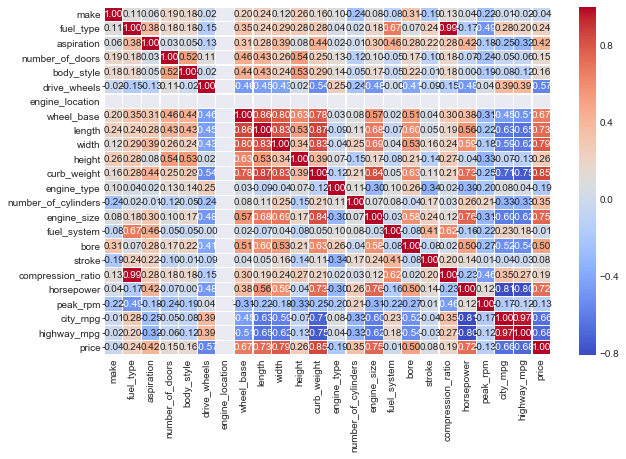

In [18]:
#Antes de definir quais são os campos utilizados para predição, vamos fazer um novo mapa de calor com a correção,
#agora com todos os campos numéricos. Assim teremos um auxílio para decidir quais campos mais se correlacionam com o preço
corr = df.corr()
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
hm = sns.heatmap(corr, ax=ax, cmap="coolwarm", annot=True, fmt='.2f', linewidths=.05)
fig.subplots_adjust(top=0.93)

**Atributos utilizados para predição** (campos mais correlacionados ao preço - acima de 0.5)
 - drive_wheels
 - wheel_base
 - length
 - width
 - curb_weight
 - number_of_cylinders
 - engine_size
 - horsepower
 - city_mpg
 - highway_mpg

**Atributo que será predito**
 - price

Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros

In [19]:
from sklearn.model_selection import train_test_split

#Cria os dataframes X (variáveis) e Y (alvo)
X = df[['drive_wheels', 
        'wheel_base',
        'length',
        'width',
        'curb_weight',
        'number_of_cylinders',
        'engine_size',
        'horsepower', 
        'city_mpg',
        'highway_mpg']]
y = df.price

#Divide em 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [20]:
#Inspeção de X_train
#Checa as quantidades de linhas e colunas
print ("Dataframe de Atributos (X)", X_train.shape)

Dataframe de Atributos (X) (130, 10)


In [21]:
#Inspeção de Y_train
#Checa as quantidades de linhas e colunas
print ("Dataframe de Predição (y)", y_train.shape)

Dataframe de Predição (y) (130,)


Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divia o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [22]:
print("==============================================================")
print("Dataframe de Atributos (X)")
print("Quantidade total de registros: %s" % X.shape[0])
print("Quantidade de registros de treino: %s (%s%%)" % (X_train.shape[0], (round(X_train.shape[0]/X.shape[0]*100, 2))))
print("Quantidade de registros de teste: %s (%s%%)" % (X_test.shape[0], (round(X_test.shape[0]/X.shape[0]*100, 2))))
print("==============================================================")
print("Dataframe de Predição (y)")
print("Quantidade total de registros: %s" % y.shape[0])
print("Quantidade de registros de treino: %s (%s%%)" % (y_train.shape[0], (round(y_train.shape[0]/y.shape[0]*100, 2))))
print("Quantidade de registros de teste: %s (%s%%)" % (y_test.shape[0], (round(y_test.shape[0]/y.shape[0]*100, 2))))
print("==============================================================")

Dataframe de Atributos (X)
Quantidade total de registros: 187
Quantidade de registros de treino: 130 (69.52%)
Quantidade de registros de teste: 57 (30.48%)
Dataframe de Predição (y)
Quantidade total de registros: 187
Quantidade de registros de treino: 130 (69.52%)
Quantidade de registros de teste: 57 (30.48%)


## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print(modelo)
    print("R2 score: %.2f" %r2_score(y_test, y_pred))

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [24]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_fit = lr_model.fit(X_train, y_train)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [25]:
#Pontuação R2
pontuacao(lr_model, X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2 score: 0.76


### Regressão de árvore de Decisão

In [26]:
from sklearn import tree
dtr_model = tree.DecisionTreeRegressor(random_state=42)
dtr_fit = dtr_model.fit(X_train, y_train)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [27]:
#Pontuação R2
pontuacao(dtr_model, X_test, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')
R2 score: 0.82


### Regressão Ridge

In [28]:
lrr_model = linear_model.Ridge(random_state=42)
lrr_fit = lrr_model.fit(X_train, y_train)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [29]:
#Pontuação R2
pontuacao(lrr_model, X_test, y_test)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)
R2 score: 0.76


**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:**

| Algoritmo                      | R2 Score | Como influenciou |
|--------------------------------|----------|------------------|
| Regressão Linear               | 0.76     | O modelo encontrou uma função linear que consegue representar relativamente bem os dados, mas nada surpreendente. Aparentemente valores dos atributos utilizados no modelo não se "acompanham" de forma linear sempre, deixando assim o modelo com uma taxa de erro de 0.34.|
| Regressão de Árvore de Decisão | 0.82     | Dividir os dados em grupos maiores e depois quebrando-os em grupos menores e assim por diante nos deu a melhor taxa de acerto. Acreditamos que isso se deu pela própria natureza do mercado de venda de veículos pois a precificação destes é muito baseada na sua segmentação e não somente em detalhes técnicos como "peso" ou "número de cilindros" por exemplo.             |
| Regressão Ridge                | 0.76     | Aqui aplica-se a mesma explicação da regressão linear, com a diferença de que na Ridge o modelo tentou fazer um encolhimento dos valores dos atributos que eram muito correlacionados. Como tivemos exatamente a mesma taxa de acerto/erro, acreditamos que este modelo não conseguiu modificar os coeficientes para obter um resultado diferente/relevante no final.           |

## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```. 

In [30]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'fit_intercept':[True,False], 
    'normalize':[True,False], 
    'copy_X':[True,False],
    'normalize':[True,False]
}
opt_model_lr = GridSearchCV(estimator=lr_model, param_grid=parameters, scoring='r2')
opt_model_lr.fit(X_train, y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Calcule as pontuações para o melhor estimador com dados de treino e teste (juntamos os dois em apenas uma implementação).

In [31]:
print("[Treino] Score: %0.3f" % opt_model_lr.score(X_train, y_train.ravel()))
print("[Teste]  Score: %0.3f" % opt_model_lr.score(X_test, y_test.ravel()))
print("Best estimators: %s" % opt_model_lr.best_estimator_)

[Treino] Score: 0.815
[Teste]  Score: 0.764
Best estimators: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


### Regulação do Modelo de Regressão de Árvore de Decisão

In [32]:
parameters = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'presort': [True,False]
}
opt_model_dtr = GridSearchCV(estimator=dtr_model, param_grid=parameters, scoring='r2')
opt_model_dtr.fit(X_train, y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'presort': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino e teste (juntamos os dois em apenas uma implementação).

In [33]:
print("[Treino] Score: %0.3f" % opt_model_dtr.score(X_train, y_train.ravel()))
print("[Teste]  Score: %0.3f" % opt_model_dtr.score(X_test, y_test.ravel()))
print("Best estimators: %s" % opt_model_dtr.best_estimator_)

[Treino] Score: 0.993
[Teste]  Score: 0.787
Best estimators: DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=8,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0, presort=True,
           random_state=42, splitter='best')


### Regulação do Modelo de Regressão Ridge

In [34]:
parameters = {
    'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01],
    'fit_intercept':[True,False],
    'copy_X':[True,False],
    'max_iter': [1, 2, 3, 4, 5],
}
opt_model_lrr = GridSearchCV(lrr_model, parameters, scoring='r2')
opt_model_lrr.fit(X_train, y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [25, 10, 4, 2, 1.0, 0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02, 0.01], 'fit_intercept': [True, False], 'copy_X': [True, False], 'max_iter': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino e teste (juntamos os dois em apenas uma implementação).

In [35]:
print("[Treino] Score: %0.3f" % opt_model_lrr.score(X_train, y_train.ravel()))
print("[Teste]  Score: %0.3f" % opt_model_lrr.score(X_test, y_test.ravel()))
print("Best estimators: %s" % opt_model_lrr.best_estimator_)

[Treino] Score: 0.812
[Teste]  Score: 0.749
Best estimators: Ridge(alpha=25, copy_X=True, fit_intercept=True, max_iter=1, normalize=False,
   random_state=42, solver='auto', tol=0.001)


Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

|                     | Regressão linear | Regressão árvore de decisão | Regressão ridge |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| R2 treino | 0.815  | 0.935  | 0.812  |
| R2 teste  | 0.764  | 0.790  | 0.749  |


**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:** Na média, a regressão por árvore de decisão teve o melhor resultado nos testes.
Acreditamos que isso se deu pela própria natureza do mercado de venda de veículos pois a precificação destes é muito baseada na sua segmentação e não somente em detalhes técnicos como "peso" ou "número de cilindros" por exemplo. Um fabricante não vai cobrar mais pelo seu carro porque ele pesa 1.100 ou 1.200 kg, mas porque carros nesse peso geralmente se enquadram em uma categoria específica e esta sim possui uma faixa de preço bem definida. Até porque se o fabricante sai muito dessa "faixa de preços" ele é prejudicado nas vendas devido à alta concorrência do segmento de automóveis nos EUA.
É importante observar também que este fator não se aplica a todos os atributos, por exemplo, um carro que possui um consumo muito melhor do que seus concorrentes pode sim custar mais caro, mesmo que faça parte do mesmo segmento.

### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [36]:
#Configuração do classificador utilizando parâmetros identificados com o GridSearchCV:
dtr_model = tree.DecisionTreeRegressor(random_state=42,
                                      criterion='mse',
                                      max_depth=12,
                                      max_features=7,
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None, 
                                      min_samples_leaf=1,
                                      min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      presort=True,
                                      splitter='best')

dtr_fit = dtr_model.fit(X_train, y_train)

#Verifica a pontuação R2
pontuacao(dtr_model, X_test, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=7,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0, presort=True,
           random_state=42, splitter='best')
R2 score: 0.75


**Resultado após tunning**
Após a passagem dos novos parâmetros na configuração do classificador, o R2 score diminuiu de 0.82 para 0.75. Por isso, voltamos o classificador como estava antes para fazer os testes nos passos seguintes:

In [37]:
#Configuração do classificador utilizando parâmetros identificados com o GridSearchCV:
dtr_model = tree.DecisionTreeRegressor(random_state=42)
dtr_fit = dtr_model.fit(X_train, y_train)

### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos

In [42]:
#################################################################################################
#Valor BAIXO
#################################################################################################
val_drive_wheels        = 2
val_wheel_base          = 93.3
val_length              = 155.8
val_width               = 63.4
val_curb_weight         = 1872
val_number_of_cylinders = 1
val_engine_size         = 87
val_horsepower          = 64
val_city_mpg            = 35.888
val_highway_mpg         = 40.111
predict_values          = [[val_drive_wheels,val_wheel_base,val_length,val_width,val_curb_weight,val_number_of_cylinders,val_engine_size,val_horsepower,val_city_mpg,val_highway_mpg]]
result_valor_baixo      = dtr_model.predict(predict_values)

#################################################################################################
#Valor MEDIANO
#################################################################################################
val_drive_wheels        = 1.2
val_wheel_base          = 101.7
val_length              = 183
val_width               = 67.34
val_curb_weight         = 2945
val_number_of_cylinders = 1.7
val_engine_size         = 148
val_horsepower          = 147
val_city_mpg            = 19.000
val_highway_mpg         = 25.285
predict_values          = [[val_drive_wheels,val_wheel_base,val_length,val_width,val_curb_weight,val_number_of_cylinders,val_engine_size,val_horsepower,val_city_mpg,val_highway_mpg]]
result_valor_mediano    = dtr_model.predict(predict_values)

#################################################################################################
#Valor ALTO
#################################################################################################
val_drive_wheels        = 1
val_wheel_base          = 107
val_length              = 193
val_width               = 69.99
val_curb_weight         = 3637
val_number_of_cylinders = 4.5
val_engine_size         = 252
val_horsepower          = 187
val_city_mpg            = 15.111
val_highway_mpg         = 19.000
predict_values          = [[val_drive_wheels,val_wheel_base,val_length,val_width,val_curb_weight,val_number_of_cylinders,val_engine_size,val_horsepower,val_city_mpg,val_highway_mpg]]
result_valor_alto       = dtr_model.predict(predict_values)

#################################################################################################
#Print dos resultados
#################################################################################################
print("-----------------------------------------")
print("Resultados")
print("-----------------------------------------")
print("Valor baixo: %0.2f" % result_valor_baixo[0])
print("Valor mediano: %0.2f" % result_valor_mediano[0])
print("Valor alto: %0.2f" % result_valor_alto[0])
print("-----------------------------------------")

-----------------------------------------
Resultados
-----------------------------------------
Valor baixo: 5572.00
Valor mediano: 12940.00
Valor alto: 28248.00
-----------------------------------------


## Conclusões finais

Este projeto apresentou de forma simplifcada o __Worflow de Machine Learning__ que pode servir como base para estudos relacionados a classificação ou predição de séries numéricas.

A fase de preparação, evidenciada no projeto, é uma das mais importantes da qual se precisa investir um bom tempo para dar os dados organizados e confiáveis, pois é a forma como os classificadores irão aprender com os exemplos e tentarão desvencilhar de efeitos indesejáveis como os vieses.

Regressores são um tipo de algoritmo de machine learning que pode ser aplicado em diversas áreas das quais é necessário predizer um número baseado em um conjunto de dados numéricos ou série numérica, logo sua aplicação é bem ampla.

**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:**
Sim, os valores previstos no passo anterior fizeram todo sentido com os valores informados ao algoritmo de predição.
Para definir esses valores nós pegamos a média de 10 observações de preço baixo, médio e alto. O resultado foi muito satisfatório. Dentro do nosso conhecimento não faríamos nada diferente.

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina?

**Resposta**: Algumas possibilidades:
 - Dadas algumas características de um prospect, quanto um cliente estaria disposto a pagar por um serviço.
 - Dadas características de corridas de taxi em uma região da cidade, quanto tempo demoraria uma nova corrida do ponto A ao ponto B (fizemos algo similar no trabalho da matéria de R)
 - Dado um histórico de inscrições em um curso, poderíamos prever o número de alunos inscritos em uma futura turma.
 - Dadas características de apps existentes (features, investimento em propaganda, região, etc.), poderíamos prever o número de downloads de um novo app.
 - Dado o histórico de vendas de qualquer produto em um supermercado, seria possível prever o valor de vendas nos próximos períodos sazonais.
 - Dado o histórico de alocação de um restaurante, seria possível prever o número de clientes em períodos futuros.